<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW%20PROJECT/SimulateChiEff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulate event (all with exactly 0 chi eff) - xtrue - variation between xhat and x true = quantifying uncertainty - generating lots of signals e.g 100 signals would expect 10 at 10% outlier and 1 at 1% outlier

Chi eff = 0, sigma =0.1 - generate 100 events - plot and analyse - stick gaussian around point - then histogram then stick real events over the top.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  # For Gaussian distribution

# Parameters
n_signals = 100 # Number of signals
true_chi_eff = 0 # All signals have chi_eff = 0
sigma = 0.1  # Standard deviation of the Gaussian error

# Generate "estimated" chi_eff values (xhat) with Gaussian errors
estimated_chi_eff_values = np.random.normal(true_chi_eff, sigma, n_signals)

# Calculate the differences (xhat - xtrue)
differences = estimated_chi_eff_values - true_chi_eff

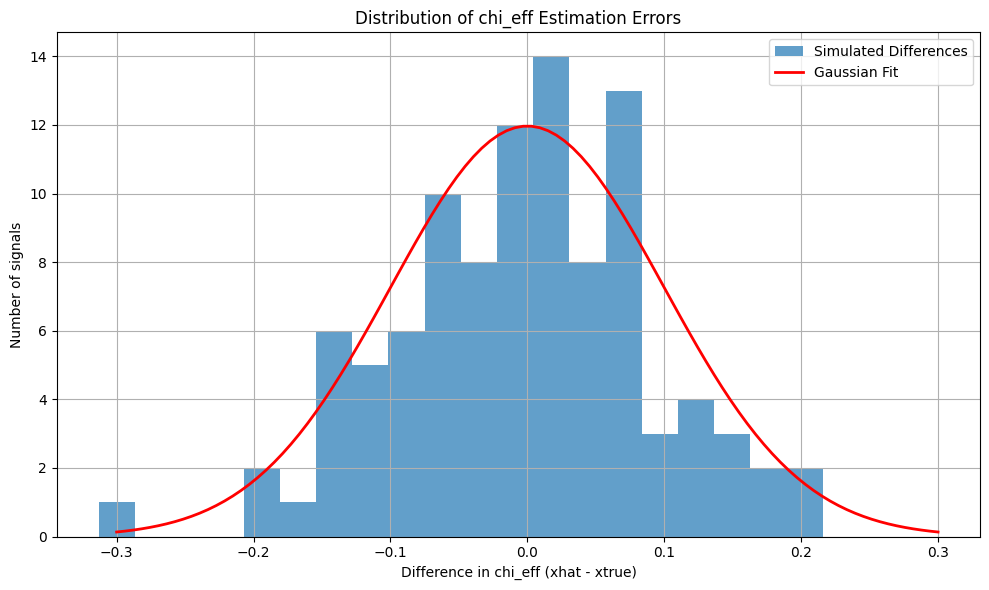

Percentage of 10% outliers: 27.00%
Percentage of 1% outliers: 89.00%
Mean difference: -0.0028
Standard deviation of difference: 0.0929


In [4]:
# 1. Histogram of the differences
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(differences, bins=20, alpha=0.7, label="Simulated Differences")  # alpha for transparency

# 2. Gaussian distribution overlay
x_values = np.linspace(-3*sigma, 3*sigma, 100)  # Range for Gaussian plot
gaussian_values = stats.norm.pdf(x_values, 0, sigma)  # Gaussian PDF
plt.plot(x_values, gaussian_values * n_signals * (3*sigma - (-3*sigma))/(20), 'r-', linewidth=2, label="Gaussian Fit")  # Scale Gaussian to histogram


plt.xlabel("Difference in chi_eff (xhat - xtrue)")
plt.ylabel("Number of signals")
plt.title("Distribution of chi_eff Estimation Errors")
plt.legend() #Show the legend
plt.grid(True) #Add a grid
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()


# --- Outlier Calculation (same as before) ---
outlier_10 = np.sum(np.abs(differences) > 0.1) / n_signals * 100
outlier_1 = np.sum(np.abs(differences) > 0.01) / n_signals * 100

print(f"Percentage of 10% outliers: {outlier_10:.2f}%")
print(f"Percentage of 1% outliers: {outlier_1:.2f}%")


# --- Statistical Analysis ---
mean_diff = np.mean(differences)
std_diff = np.std(differences)

print(f"Mean difference: {mean_diff:.4f}")
print(f"Standard deviation of difference: {std_diff:.4f}")